# 6.3 Geographic Visualization

### This script contains the following:

1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

## 1. Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
# Import ".json" file for the world countries

country_geo = r'C:\Users\Lucero\Documents\Adidas US Sales\Achievement 6\02 Data\countries.geojson.json'

In [5]:
import json

f = open(r'C:\Users\Lucero\Documents\Adidas US Sales\Achievement 6\02 Data\countries.geojson.json')

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)


{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
#path

path = r'C:\Users\Lucero\Documents\Adidas US Sales'

In [7]:
#import data

df = pd.read_csv(os.path.join(path,'Adidas Prepared Data','Sales_cleaned(1).csv'), index_col = False)

In [8]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [9]:
df.shape

(9648, 13)

In [10]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

## 2. Data Wrangling

In [11]:
# select only the necessary columns and put them in a list called columns
columns = ["Retailer", "Invoice Date", "State", "Product", "Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin", "Sales Method"]

In [12]:
# create a subset
State_rec = df[columns]

In [13]:
State_rec.head()

,Retailer,Invoice Date,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1/1/2020,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1/2/2020,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1/3/2020,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1/4/2020,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1/5/2020,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## 3. Conduct consistency checks

In [14]:
#check for missing values
State_rec.isnull().sum()

Retailer            0
Invoice Date        0
State               0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

no missing Values!

In [15]:
#check for duplicates checks
dups = State_rec.duplicated()

In [16]:
dups.shape

(9648,)

<Axes: xlabel='Units Sold', ylabel='Count'>

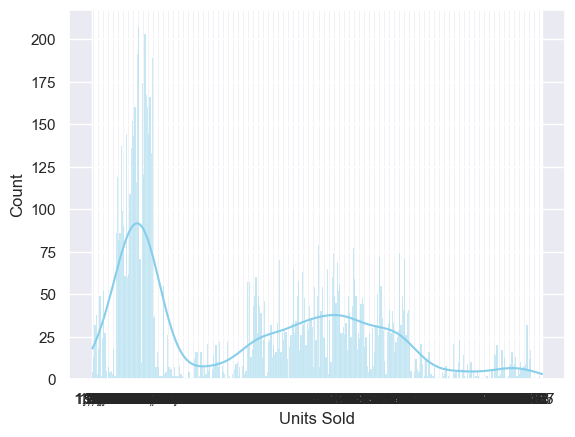

In [20]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")


sns.histplot(State_rec['Units Sold'], bins=20, kde = True, color="skyblue")



<Axes: xlabel='Total Sales', ylabel='Count'>

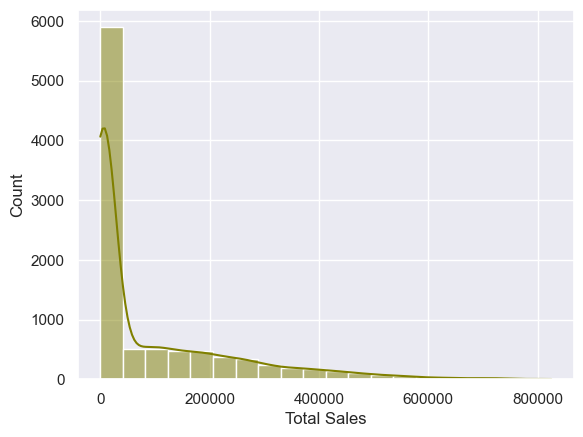

In [24]:
sns.histplot(State_rec['Total Sales'], bins=20, kde = True, color="olive")


### The "outliers" the data is very spread out on the graph I will have to do more research. I will create another subset where you can better appreciate the values.

In [31]:
# Create a new dataset to investigate

State_rec_sal = State_rec.loc[State_rec['Total Sales'] < 10000]

<Axes: xlabel='Total Sales', ylabel='Count'>

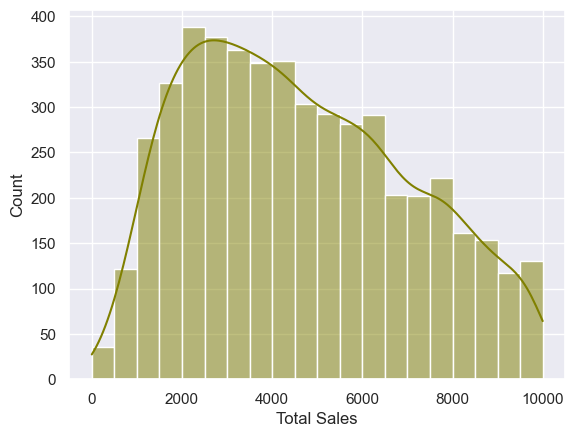

In [33]:
sns.histplot(State_rec_sal['Total Sales'], bins = 20, kde = True, color="olive")

<Axes: xlabel='Operating Profit', ylabel='Count'>

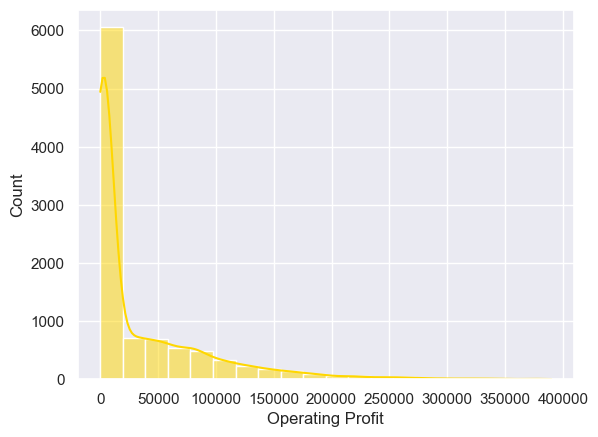

In [34]:
sns.histplot(State_rec['Operating Profit'], bins=20, kde = True, color="gold")


### I will create another subset where you can better appreciate the values.

In [35]:
# Create a new dataset to investigate

State_rec_prof = State_rec.loc[State_rec['Operating Profit'] < 10000]

<Axes: xlabel='Operating Profit', ylabel='Count'>

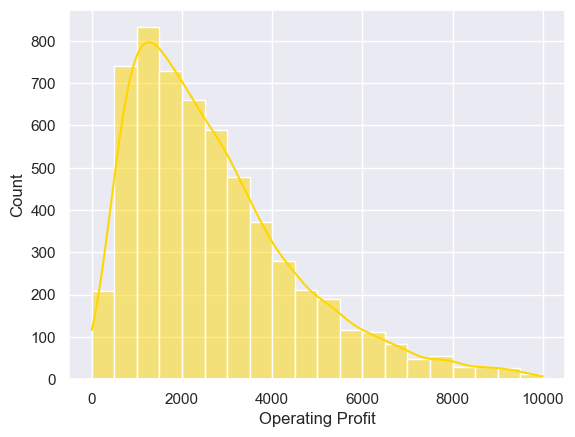

In [36]:
sns.histplot(State_rec_prof['Operating Profit'], bins = 20, kde = True, color="gold")

<Axes: xlabel='Operating Margin', ylabel='Count'>

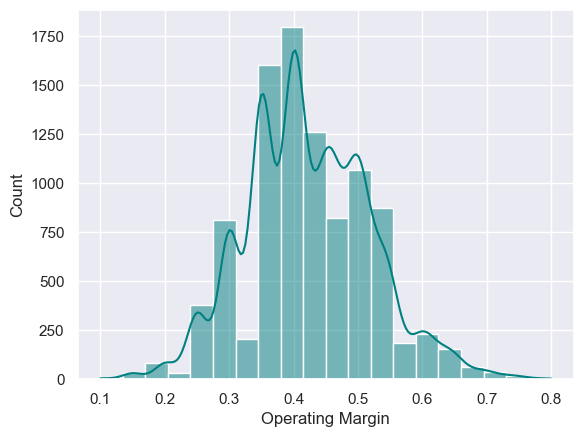

In [37]:
sns.histplot(State_rec['Operating Margin'], bins=20, kde = True, color="teal")

## 4. Plotting a choropleth

### State and Total Sales

In [40]:
# Create a data frame with country and happiness score
data_to_plot = State_rec[['State','Total Sales']]

In [41]:
data_to_plot.head()

,State,Total Sales
0,New York,600000.0
1,New York,500000.0
2,New York,400000.0
3,New York,382500.0
4,New York,540000.0


In [42]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Total Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Sales").add_to(map)
folium.LayerControl().add_to(map)

map

### State and Operating Profit

In [43]:
# Create a data frame with country and happiness score
data_to_plot1 = State_rec[['State','Operating Profit']]

In [44]:
data_to_plot1.head()

,State,Operating Profit
0,New York,300000.0
1,New York,150000.0
2,New York,140000.0
3,New York,133875.0
4,New York,162000.0


In [46]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State', 'Operating Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Operating Profit").add_to(map)
folium.LayerControl().add_to(map)

map

## State and Operating Margin

In [48]:
# Create a data frame with country and happiness score
data_to_plot2 = State_rec[['State','Operating Margin']]

In [49]:
data_to_plot2.head()

,State,Operating Margin
0,New York,0.50
1,New York,0.30
2,New York,0.35
3,New York,0.35
4,New York,0.30


In [50]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Operating Margin'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Operating Margin").add_to(map)
folium.LayerControl().add_to(map)

map

# Save Maps

In [52]:
map.save('plot_data.html')

## 5. Results

### Does the analysis answer any of your existing research questions?



Yes, with the recent analysis it gives us a much clearer perspective regarding the states that have the highest sales, in this case it would be the states of New York, Illinois, Arizona and Atlanta. As well, it shows me which regions have the lowest values, with this analysis you can make effective decisions with those sectors. 


### New Research


However, I can add that the states that present the highest total sales are not necessarily the states that exactly have the highest business profit.